In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *

#Carrega o arquivo Excel
file_path = 'Sistema2-G12.xlsx'
df = pd.read_excel(file_path, sheet_name='Planilha1')

df.dtypes

Scan Sweep Time (Sec)    datetime64[ns]
Scan Number                       int64
101Time (Sec)            datetime64[ns]
101 (°C)                        float64
102Time (Sec)            datetime64[ns]
102 (°C)                        float64
103Time (Sec)            datetime64[ns]
103 (°C)                        float64
104Time (Sec)            datetime64[ns]
104 (°C)                        float64
105Time (Sec)            datetime64[ns]
105 (°C)                        float64
106Time (Sec)            datetime64[ns]
106 (°C)                        float64
107Time (Sec)            datetime64[ns]
107 (°C)                        float64
108Time (Sec)            datetime64[ns]
108 (°C)                        float64
109Time (Sec)            datetime64[ns]
109 (°C)                        float64
110Time (Sec)            datetime64[ns]
110 (°C)                        float64
111Time (Sec)            datetime64[ns]
111 (°C)                        float64
112Time (Sec)            datetime64[ns]


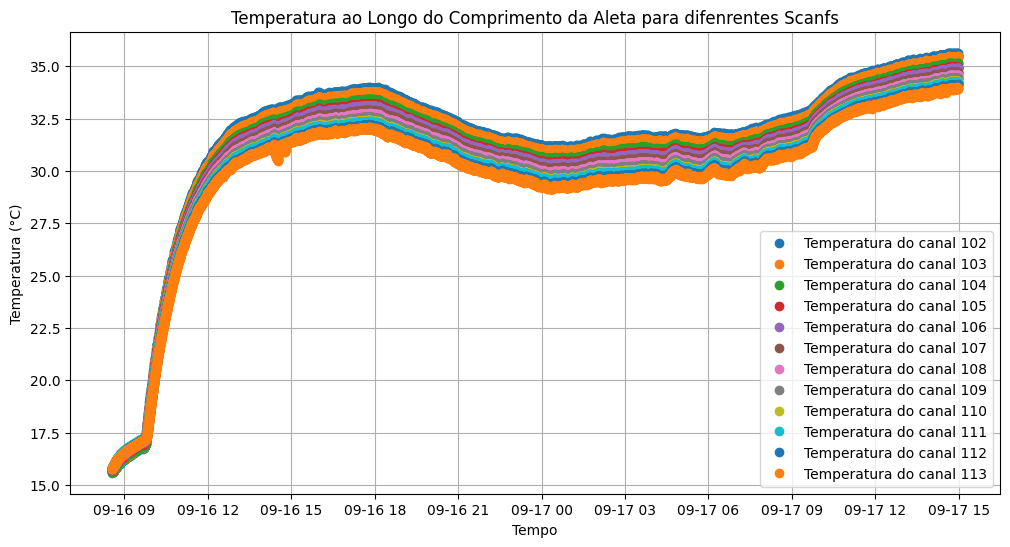

In [66]:

#Definindo as linhas de interesse
start_row = 0

#Definindo as colunas de interesse (12 pontos)
coluna_t_amb = ['101 (°C)']
coluna_t_base = ['102 (°C)']
t_amb = df.loc[start_row:, coluna_t_amb]
t_base = df.loc[start_row:, coluna_t_base]
plt.figure(figsize=(12, 6))
matriz_medias = {}
for i in range(102, 114):
    temps = df.loc[start_row:, f"{i} (°C)"]
    matriz_medias [f"Canal {i}"]= temps.mean()
    scanf_values = df.loc[start_row:, 'Scan Sweep Time (Sec)']
    plt.plot(scanf_values, temps,'o', label=f'Temperatura do canal {i}')


    

plt.title('Temperatura ao Longo do Comprimento da Aleta para difenrentes Scanfs')
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()


Ex3 

In [ ]:

# Adotando o caso A
def calculo_T_teorico(L,P,Atr, h, k,Tb, T_amb,x):
    
    m =sqrt((h*P) /( k * Atr))
    const = h/(m*k)
    numerador = (cosh(m*(L-x))+const *sinh(m*(L-x)))
    denominador = (cosh(m*L) + const*sinh(m*L))

    T_teorico = (numerador / denominador)*(Tb-T_amb) + T_amb
    return T_teorico


# Exemplo de valor para m
L_mm = 181
L = L_mm/1000 # m
delta_x_mm = 15
delta_x = delta_x_mm/1000  # Espaçamento da malha (m)

k = 880 # Calor específico (J/kgK)
rho = 2794 # Kg/ m^3
r = 0.015 # m

Atr = pi* r**2  # Área da seção (m²)
h = 6 # Coeficiente de transferência de calor (W/m²K)
P = 2*pi*r
Tb =  t_base.mean().values[0]
T_amb  = t_amb.mean().values[0]
h = np.linspace(0.00001, 6, num=1000)

for X in range(1,181,15):
    T_teorico = calculo_T_teorico(L,P,Atr, h, k,Tb, T_amb,X)
        

    
    

In [64]:

T_teorico = calculo_T_teorico(L,P,Atr, h, k,Tb, T_amb,L)
print(f"A T da na aleta esperanda em x= {L} é: {matriz_medias["Canal 113"]:.2f}")
print(f"A T_teorico da na aleta em x= {L} é: {T_teorico:.2f}")

# for x_mm in range(1,L_mm+1,delta_x_mm):
#     x = x_mm/1000 
#     T_teorico = calculo_T_teorico(L,P,Atr, h, k,Tb, T_amb,x)
#     print(f"A T da na aleta em x= {x} é: {T_teorico:.2f}")

A T da na aleta esperanda em x= 0.181 é: 30.50
A T_teorico da na aleta em x= 0.181 é: 30.50


In [46]:
def T_teorico(x,C1,C2):
    # Constantes
    T_amb = 17.65
    constante = 2.596

    # Cálculo da equação
    T = C1 * exp(constante * x) + C2 * exp(-constante) + T_amb
    return T





In [ ]:
# Testando para x = 0.16
x = 0.171
resultado = T_teorico(x)
print(f"T_teórico({x}) = {resultado:.2f} °C")